In [1]:
# multidimensional arrays
import numpy as np

# inline plots
import matplotlib.pyplot as plt
%matplotlib inline

# nicer figures
import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

# Return to the origin


For a *finite* random walk of (large) length $n$, it is known that the expected number of returns to the origin $T_n$ scales like follows:
$$
\left\langle T_n \right\rangle \sim \left\{
\begin{array}{ll}
\sqrt{n} & d=1 \\
\log(n) & d=2 \\
C_d & d\geq 3
\end{array}
\right.
$$


<img src="attachment:image.png" width="600">

Notice that for $d \geq 3$, $\left\langle T_n \right\rangle$ does **not** grow with $n$, which must mean that the walker somehow "escapes" and never returns back to the origin. The probability of return to the origin is less than 1! For an infinite-length random walk, indeed the probability of returning to the origin $\rho$ is seen to be

$$
\rho \sim \left\{
\begin{array}{ll}
1 & d=1 \\
1 & d=2 \\
<1 & d\geq 3
\end{array}
\right.
$$

The *intuitive* explanation of this amazing fact is that, as the dimension $d$ grows, there are "more directions available", and so more chances for the walker to "get lost" and never return to the origin. There is of course a formal proof as well, but today we will do a **computational verification** of these facts, which is no substitute for a formal proof but is often all we can do!

## Generating Random Walks


### Exercise 3.1
Write a function that generates a random walk of given length in $d$ dimensions. Your random walker should move as follows:

+ At each time-step, the walker moves only in one direction.
+ At each time-step, the walker moves only by -1 or +1

Your function should return a numpy array of shape (`length`, `dim`). Example:
```python
>>> # create a RW of length 10 in dimension 3
>>> traj = get_traj(length=10, dim=3)
>>> # check that the output has the right shape
>>> traj.shape
(10, 3)
```

In [2]:
def get_traj(length=100, dim=2):
    """Generate a RW in d dimensions
    
    Parameters
    ----------
    length: int
        Length of the RW.
    dim: int
        Dimension of the RW


    Returns
    -------
    traj : np.ndarray, (length, dim)
        The positions of the RW.
    
    Notes
    -----
    At each time-step, the walker moves in only one direction.
    At each time-step, the walker moves by -1 or +1
    """
    #genero vettore che conterrà la traiettoria - vettore è vuoto
    #vettore ha length + 1 perchè la posizione di partenza è il primo elemento del vettore
    #così facendo per giungere all'ultima casella ho fatto il numero di step richiesto
    traj  = np.zeros(shape = (length + 1, dim))
    
    for t in range(1, length + 1):
        #copio contenuto della colonna precedente in modo tale da evolvere sulla posizione dove ho il corpo
        traj[t, :] = traj[t-1, : ]
        traj[t, np.random.randint(dim,size = 1)] += np.random.choice([-1,1])
        
    return traj

### Verification
To make sure that your function works correctly, execute the following cell. Notice the use of `assert` statements: execution should fail if something goes wrong. If everything is fine, nothing should happen.

In [3]:
# basic checks for your RW generator
for dim in range(1, 5):
    for length in [10, 100, 200, 500]:
        traj = get_traj(length = length, dim = dim)
        # make sure traj has the right shape
        assert traj.shape == (length + 1, dim)
        # make sure all steps are -1 or 1 in only one direction
        assert np.all(np.sum(np.diff(traj, axis=0) != 0, axis=1) == np.ones(length))

### Exercise 3.2
Plot a random walk of length $10^4$ for $d=1$ (time in x-axis, position in y-axis) and $d=2$ (x,y components in x,y-axis). Remember to use **axis labels**.

In [4]:
%%time
# it is better if you use one cell to generate the random walks, and a second cell to plot them
RW_1d = get_traj(10 ** 4, 1)
RW_2d = get_traj(10 ** 4, 2)

CPU times: user 805 ms, sys: 2.62 ms, total: 808 ms
Wall time: 807 ms


Text(0.5, 1.0, 'Random Walk 2D')

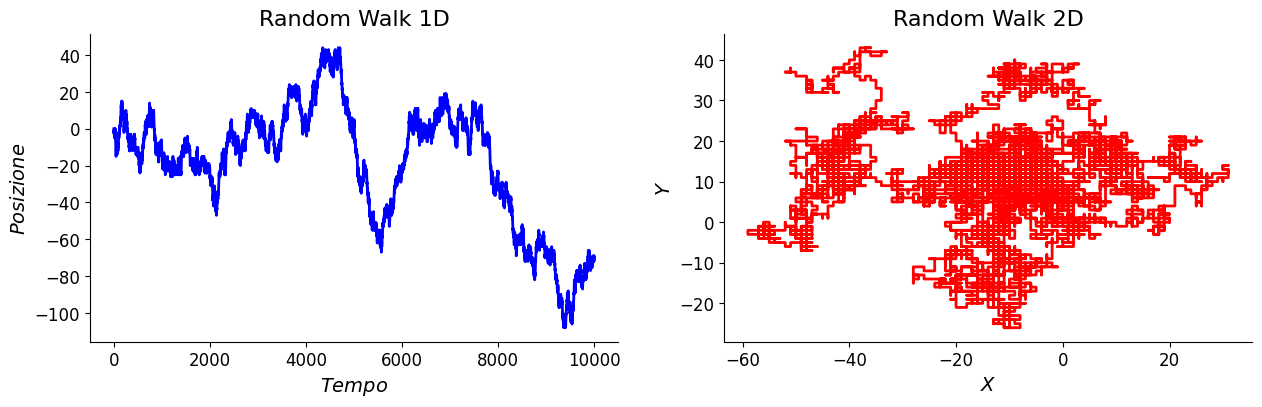

In [5]:
# We generate a figure with two subplots, called axis in matplotlib.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))

#creo valori del tempo per il cammino unidimensionale
t = np.linspace(0, 10 ** 4, 10 **4 + 1)
ax1.plot(
        t, RW_1d,
        color = "blue",
        lw = 2,
        label = "Two dimensional random walk"
    )

#Titoli assi per il primo grafico
ax1.set_xlabel(r"$Tempo$")
ax1.set_ylabel(r"$Posizione$")
#Titolo grafico per il primo grafico
ax1.set_title(f"Random Walk 1D")




#Riempio il secondo grafico
ax2.plot(
        RW_2d[:, 0], RW_2d[:, 1],
        color = "red",
        lw = 2,
    )

#Titoli assi per il secondo grafico
ax2.set_xlabel(r"$X$")
ax2.set_ylabel(r"$Y$")
#Titolo grafico per il secondo grafico
ax2.set_title(f"Random Walk 2D")

## Counting the number of returns to the origin
Since we are interested in how **the expected number of returns to the origin** scales with the RW length, we don't need to store the whole trajectory of each simulation (we will be performing many simulations!). 

### Exercise 3.3
Write a function that generates a RW of given length and dimension (calling `get_traj`), and returns the number of times it returned to the origin. To count the number of returns to the origin, you might need to use the following functions:
```python
np.all()
np.zeros()
```

In [6]:
def get_num_returns(length, dim):
    #Creo random walk di una certa lunghezza
    traj = get_traj(length, dim)
    
    #printing per test
    #print(traj)
    
    #Creo contatore per confronto
    num_returns_to_origin = 0
    
    # count how many times it goes through the origin
    for t in range(1, length + 1):
        if np.all(traj[t, :] == 0):
            num_returns_to_origin += 1
    
    return num_returns_to_origin

In [7]:
#Test metodo
print(get_num_returns(10, 2))

0


### Exercise 3.4
Write a function that computes the expected number of returns to the origin for a given length and dimension. Your function will call `get_num_returns()`, and should have an additional parameter that sets the sample size.

In [8]:
def get_average_num_returns(length, dim, num_trajs=200):
    #Pongo a zero la variabile di appoggio
    avarage_num_returns = 0
    
    for i in range(0, num_trajs):
        avarage_num_returns = avarage_num_returns * i/(i+1) + get_num_returns(length, dim)/(i+1)
    
    print(f"Trovata media - lunghezza $RW$ = {length}")
    
    return avarage_num_returns

In [9]:
#Test metodo
print(get_average_num_returns(10, 2, 2))

Trovata media - lunghezza $RW$ = 10
0.0


## Comparing with analytical results
We are now ready to compare our analytical results with numerical simulations! We want to plot the expected number of returns to the origin as a function of the RW length. To do this, it is useful to first define an array of RW lengths.

In [10]:
# define range of RW lengths
length_min = 10
length_max = 100000
# generate points logarithmically spaces
# and convert them to integers
length_array = np.array([
    int(x)
    for x in np.geomspace(length_min, length_max, num=20)
])

(tip: if your RW generating function is not very efficient, you might want to decrease `length_min`)  

Executing the following cell will run all simulations for $d=1$


In [11]:
%%time
#Simulazione RW_1D
dim=1
num_returns_array = np.array([
    get_average_num_returns(length=length, dim=dim, num_trajs = 20)
    for length in length_array
])

Trovata media - lunghezza $RW$ = 10
Trovata media - lunghezza $RW$ = 16
Trovata media - lunghezza $RW$ = 26
Trovata media - lunghezza $RW$ = 42
Trovata media - lunghezza $RW$ = 69
Trovata media - lunghezza $RW$ = 112
Trovata media - lunghezza $RW$ = 183
Trovata media - lunghezza $RW$ = 297
Trovata media - lunghezza $RW$ = 483
Trovata media - lunghezza $RW$ = 784
Trovata media - lunghezza $RW$ = 1274
Trovata media - lunghezza $RW$ = 2069
Trovata media - lunghezza $RW$ = 3359
Trovata media - lunghezza $RW$ = 5455
Trovata media - lunghezza $RW$ = 8858
Trovata media - lunghezza $RW$ = 14384
Trovata media - lunghezza $RW$ = 23357
Trovata media - lunghezza $RW$ = 37926
Trovata media - lunghezza $RW$ = 61584
Trovata media - lunghezza $RW$ = 100000
CPU times: user 3min 32s, sys: 37.6 ms, total: 3min 32s
Wall time: 3min 33s


### Exercise 3.5
Plot the average number of returns to the origin of a 1D RW as a function of the RW length, together with the expected theoretical result. Do your results verify the $n^{1/2}$ scaling? **Tip** Use double-logarithmic scales in your plot. Remember to include label axis, and a legend!

Text(0.5, 1.0, 'Numerical vs Theoretical results')

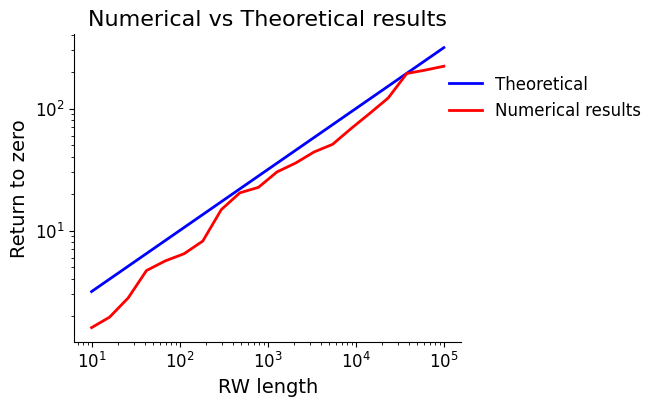

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))

#RISULTATI TEORICI
#Determino quanto valga radice di n nei vari casi
y_teo = np.sqrt(length_array)
ax.loglog( 
    length_array, y_teo,
    color = "blue",
    lw = 2,
    label="Theoretical")

# plot numerical result
ax.loglog(
    length_array, num_returns_array,
    color = "red",
    lw = 2,
    label="Numerical results")


# add axis labels
ax.set_xlabel(r"RW length")
ax.set_ylabel(r"Return to zero")
# add a legend
ax.legend(loc=(0.95, 0.7), frameon=False)
# add a title (e.g. that says what dimension we used)
ax.set_title(f"Numerical vs Theoretical results")


### Exercise 3.6
Plot the average number of returns to the origin of a 2D RW as a function of the RW length. Do your results verify the $log(n)$ scaling? What are the best axis scales to use in this case?

In [13]:
#Simulazione RW_2D
dim=2
num_returns_array = np.array([
    get_average_num_returns(length=length, dim=dim, num_trajs = 10)
    for length in length_array
])

Trovata media - lunghezza $RW$ = 10
Trovata media - lunghezza $RW$ = 16
Trovata media - lunghezza $RW$ = 26
Trovata media - lunghezza $RW$ = 42
Trovata media - lunghezza $RW$ = 69
Trovata media - lunghezza $RW$ = 112
Trovata media - lunghezza $RW$ = 183
Trovata media - lunghezza $RW$ = 297
Trovata media - lunghezza $RW$ = 483
Trovata media - lunghezza $RW$ = 784
Trovata media - lunghezza $RW$ = 1274
Trovata media - lunghezza $RW$ = 2069
Trovata media - lunghezza $RW$ = 3359
Trovata media - lunghezza $RW$ = 5455
Trovata media - lunghezza $RW$ = 8858
Trovata media - lunghezza $RW$ = 14384
Trovata media - lunghezza $RW$ = 23357
Trovata media - lunghezza $RW$ = 37926
Trovata media - lunghezza $RW$ = 61584
Trovata media - lunghezza $RW$ = 100000


Text(0.5, 1.0, 'Numerical vs Theoretical results')

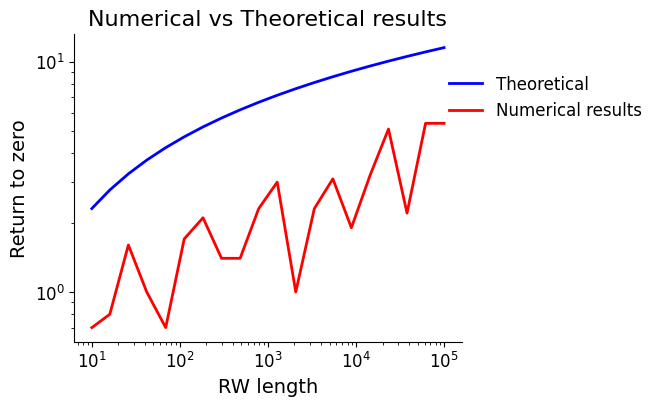

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))

#RISULTATI TEORICI
#Determino quanto valga logaritmo di n nei vari casi
y_teo = np.log(length_array)
ax.loglog( 
    length_array, y_teo,
    color = "blue",
    lw = 2,
    label="Theoretical")

# plot numerical result
ax.loglog(
    length_array, num_returns_array,
    color = "red",
    lw = 2,
    label="Numerical results")


# add axis labels
ax.set_xlabel(r"RW length")
ax.set_ylabel(r"Return to zero")
# add a legend
ax.legend(loc=(0.95, 0.7), frameon=False)
# add a title (e.g. that says what dimension we used)
ax.set_title(f"Numerical vs Theoretical results")


### Exercise 3.7
Show numerically that, for $d=3$ and $d=4$, the expected number of returns to the origin is **constant**.

In [15]:
#Simulazione per d = 3
dim=3
num_returns_array_3D = np.array([
    get_average_num_returns(length=length, dim=dim, num_trajs = 10)
    for length in length_array
])


Trovata media - lunghezza $RW$ = 10
Trovata media - lunghezza $RW$ = 16
Trovata media - lunghezza $RW$ = 26
Trovata media - lunghezza $RW$ = 42
Trovata media - lunghezza $RW$ = 69
Trovata media - lunghezza $RW$ = 112
Trovata media - lunghezza $RW$ = 183
Trovata media - lunghezza $RW$ = 297
Trovata media - lunghezza $RW$ = 483
Trovata media - lunghezza $RW$ = 784
Trovata media - lunghezza $RW$ = 1274
Trovata media - lunghezza $RW$ = 2069
Trovata media - lunghezza $RW$ = 3359
Trovata media - lunghezza $RW$ = 5455
Trovata media - lunghezza $RW$ = 8858
Trovata media - lunghezza $RW$ = 14384
Trovata media - lunghezza $RW$ = 23357
Trovata media - lunghezza $RW$ = 37926
Trovata media - lunghezza $RW$ = 61584
Trovata media - lunghezza $RW$ = 100000


In [16]:
#Simulazione per d = 4
dim=4
num_returns_array_4D = np.array([
    get_average_num_returns(length=length, dim=dim, num_trajs = 10)
    for length in length_array
])

Trovata media - lunghezza $RW$ = 10
Trovata media - lunghezza $RW$ = 16
Trovata media - lunghezza $RW$ = 26
Trovata media - lunghezza $RW$ = 42
Trovata media - lunghezza $RW$ = 69
Trovata media - lunghezza $RW$ = 112
Trovata media - lunghezza $RW$ = 183
Trovata media - lunghezza $RW$ = 297
Trovata media - lunghezza $RW$ = 483
Trovata media - lunghezza $RW$ = 784
Trovata media - lunghezza $RW$ = 1274
Trovata media - lunghezza $RW$ = 2069
Trovata media - lunghezza $RW$ = 3359
Trovata media - lunghezza $RW$ = 5455
Trovata media - lunghezza $RW$ = 8858
Trovata media - lunghezza $RW$ = 14384
Trovata media - lunghezza $RW$ = 23357
Trovata media - lunghezza $RW$ = 37926
Trovata media - lunghezza $RW$ = 61584
Trovata media - lunghezza $RW$ = 100000


Text(0.5, 1.0, 'Random Walk 4D')

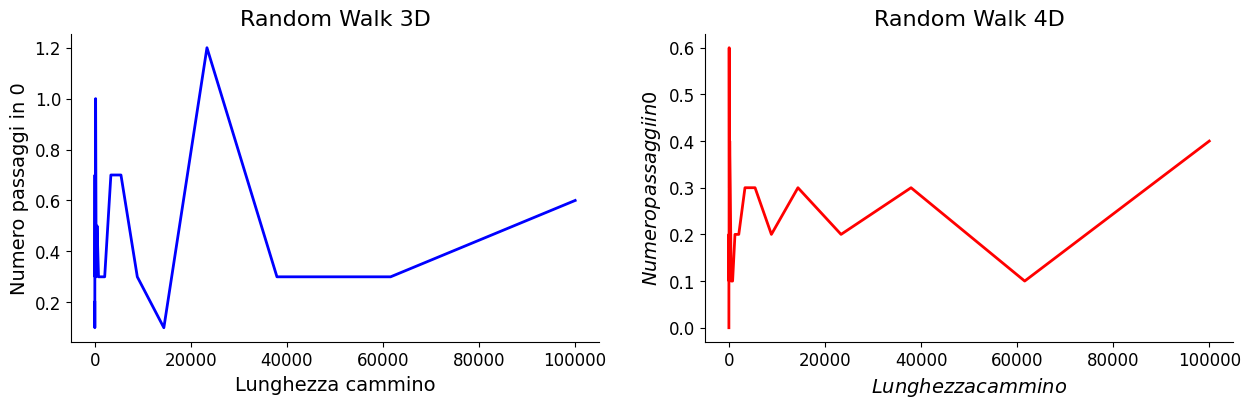

In [17]:
#Plot con expected number of returns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))

#creo valori del tempo per il cammino unidimensionale
ax1.plot(
        length_array, num_returns_array_3D,
        color = "blue",
        lw = 2,
        label = "Two dimensional random walk"
    )

#Titoli assi per il primo grafico
ax1.set_xlabel(r"Lunghezza cammino")
ax1.set_ylabel(r"Numero passaggi in 0")
#Titolo grafico per il primo grafico
ax1.set_title(f"Random Walk 3D")




#Riempio il secondo grafico
ax2.plot(
        length_array, num_returns_array_4D,
        color = "red",
        lw = 2,
    )

#Titoli assi per il secondo grafico
ax2.set_xlabel(r"$Lunghezza cammino$")
ax2.set_ylabel(r"$Numero passaggi in 0$")
#Titolo grafico per il secondo grafico
ax2.set_title(f"Random Walk 4D")

# Self-Avoiding Walks
Self-avoiding walks (SAW) are simply random walks in a regular lattice with the additional constraint that no point can be visited more than once. That is, SAWs cannot intersect themselves. The most well-known application of SAW is to model linear polymers, where obviously two monomers cannot occupy the same space (excluded volume effect).


You can read more about self-avoiding walks in this nice introduction by Gordon Slade:

[Self-Avoiding Walks, by Gordon Slade](https://www.math.ubc.ca/~slade/intelligencer.pdf)

## Simulating Self-Avoiding Walks
Generating a SAW is not trivial. If you try to generate a SAW stochastically, that is, one step at a time, you will miserably fail: your walker might get into traps (configurations with no allowed movements), and if it does you will have to discard your simulation. It turns out you will have to discard your simulation *really* often, so that for large lengths, you will basically never find a valid path. In addition, the paths you will find for short lengths will not come up with the right probabilities. Bear in mind that we want to **uniformly sample** the set of SAW of given length $n$, SAW($n$). That is, we want that all paths from SAW($n$) are generated with the same probability.

The solution is to use a Monte Carlo algorithm that, given one element $\alpha \in \text{SAW}(n)$, generates a new one $\beta \in \text{SAW}(n)$ with some probability $P_{\alpha \beta}$. If in addition our algorithm satisfies **detailed balance** and is **ergodic**, then we known that it will converge to the equilibrium distribution (the uniform distribution in our case).


## The pivot algorithm
We will implement the pivot algorithm, which is simple, effective, and satisfies detailed balance and ergodicity. You can read about the details of the pivot algorithm here:

[The Pivot Algorithm: A Highly Efficient Monte Carlo Method for the Self-Avoiding Walk](https://link.springer.com/article/10.1007/BF01022990)

(tip: if you're at home, **do not** use tools such as sci-hub to download the paper).

Given a self-avoiding walk of length $n$, the pivot algorithm generates the next walk $\beta \in \text{SAW}(n)$ as follows:

1. **Choose a point of $\alpha$ at random**, splitting the path in two bits: the head (from the origin to the chosen point) and the tail (from the chosen point to the end of the path). Notice that both the head and the tail are SAWs.
2. **Apply a transformation to the tail**, leaving the head intact. The transformation must be an orthoganl transformation that leaves the regular lattice intact (so, either a reflection or a $90º, 180º$ or $270º$ rotation). For simplicity, we will use only **rotations** (read the paper to see why this is ok).
3. **Check if the new path is self-avoiding**. If so, return it. Otherwise, return the original path.

Iterating these steps one obtains a **Markov** chain of SAWs: $\alpha_1 \to \alpha_2 \to \dots \to \alpha_M $. Notice that $\alpha_i$ are not uncorrelated, but because the algorithm satisfies detailed balance and is ergodic, we know that it approaches the equilibrium distribution. This means that we can use our Markov chain to compute **expected values** as long as it is long enough.

## Implementing the pivot step in 2D
To implement the **pivot algorithm** in 2D, we will write one function that does steps 1 and 2, and another function that does step 3. We will also need a function to generate standard 2D random walks.

### Exercise 3.8
Write a function `get_traj` that generates a 2D random walk of given length.

In [18]:
def get_traj(length):
    
    #Vettore di traiettoria
    traj = np.zeros(shape = (length + 1, 2))
    
    for t in range (1, length +1):
        traj[t, :] = traj[t-1, : ]
        traj[t, np.random.randint(2,size = 1)] += np.random.choice([-1,1])
             
    return traj


In [19]:
#Test metodo
print(get_traj(length = 10))

[[ 0.  0.]
 [ 1.  0.]
 [ 1.  1.]
 [ 1.  2.]
 [ 1.  1.]
 [ 0.  1.]
 [ 1.  1.]
 [ 1.  0.]
 [ 1. -1.]
 [ 1. -2.]
 [ 1. -1.]]


### Exercise 3.9
Write a function `pivot_traj` that, given a 2D random walk, performs steps 1 and 2 of the pivot algorithm. Some useful functions:
```python
np.random.randint()
np.concatenate()
```
You might also want to multiply matrices using the `@` operator:
```python
>>> a = np.array([[1, 2], [3, 4], [5, 6]])
>>> b = np.array([1, 1])
>>> a @ b
array([ 3,  7, 11])
```


In [20]:
def pivot_traj(traj):
    """Apply a random rotation to part of a RW."""
    
    # choose the pivot
    pivot_index = np.random.randint(0, traj.shape[0])
    pivot_point = traj[pivot_index, : ]

    # split head and tail - punto pivot lo metto nella testa del percorso rimanente
    traj_head = traj[0 : pivot_index, : ]
    traj_tail = traj[pivot_index: , :]
    
    # define the rotation matrices
    symmetries = [
        # 90 deg rotation
        np.array([[0,-1], [1,0]]),
        # 180 deg rotation
        np.array([[-1,0], [0,-1]]),
        # 270 deg rotation
        np.array([[0,1], [-1,0]]),
    ]
    
    # choose one rotation at random
    c = np.random.randint(0,3)
    symmetry = symmetries[c]

    #apply the transformation to the tail
    appo = traj_tail - pivot_point
    
    new_tail=np.array([
        symmetry @ (t-pivot_point) + pivot_point
        for t in traj_tail
    ])
    
    #new_tail= symmetry @ (traj_tail - pivot_point) + pivot_point
    
    # join the old head with the new tail
    new_traj = np.concatenate((traj_head, new_tail))
    
    return new_traj

In [21]:
#Test metodo
traj = np.array([[0,0], [0,1], [0,2]])
print(pivot_traj(traj))

[[ 0  0]
 [-1  0]
 [-2  0]]


### Exercise 3.10
Write a function that counts the number of self-intersections of a RW. Notice that SAWs have 0 self intersections, so that will solve step 3 of the pivot algorithm, but will also be useful to generate the initial condition. One way of approaching this exercise is to count how many *different* points the path visits.

In [22]:
def count_self_intersections(traj):
    """Count the number of self-intersections of a RW"""
    counter = 0
    for t in range (0, traj.shape[0] - 1):
        for w in range (t+1, traj.shape[0]):
            if np.all(traj[t, :] == traj[w, :]):
                counter += 1
    
    return counter

### Exercise 3.11
Verify that your `count_self_intersecitons` function works properly by using short trajectories for which you know the answer.

In [23]:
#Test metodo precedente
traj = np.array([[0, 0], [1,0], [1, 1], [1, 0], [1, -1], [0, -1], [0, 0]])
num = count_self_intersections(traj)
print(num)

2


## Generating the initial condition
You might have noticed that the pivot algorithm requires an element of SAW($n$) as starting condition, to then generate a Markov chain easily. But how do you get this first element? We will use the following strategy:
1. Generate a standard 2D random walk, and count the number of self intersections.
2. Apply the pivot transformation to get a new 2D random walk, and count the number of self-intersections-
3. If the number of self-intersections has decreased or not changed, keep the new path. Else, keep the old one.
4. Go to 2, till the number of self-intersections is 0.

### Exercise 3.12
Write a function `get_first_SAW` that generates a SAW of given length

In [24]:
def get_first_SAW(length, max_tries=1000000):
    #Genero il random walk richiesto
    traj = get_traj(length = length)
    #Valuto quante auto-intersezioni esso abbia
    num = count_self_intersections(traj)
    num1 = 0
    
    #Indice per ciclo while
    i = 0
    
    while(num != 0 and i < max_tries):
        
        #Creo la nuova traiettoria
        traj1 = traj
        traj = pivot_traj(traj)
        
        
        #Calcolo nuovo numero di auto-intersezioni
        num1 = count_self_intersections(traj)
        
        #Caso in cui num1 > num
        if(num1 > num):
            traj = traj1
            i += 1
        
        #Devo cambiare il valore di num
        else:
            num = num1
    
    if(i < max_tries):
        print("Trovato SAW")
        return traj

    else:
        print("Non è stato possibile ottenere un SAW")
        return traj

    
        

In [25]:

#Test metodo
test = get_first_SAW(length = 10, max_tries = 1000)
print(test)

Trovato SAW
[[ 0.  0.]
 [-1.  0.]
 [-1. -1.]
 [ 0. -1.]
 [ 1. -1.]
 [ 1. -2.]
 [ 0. -2.]
 [-1. -2.]
 [-2. -2.]
 [-3. -2.]
 [-3. -1.]]


### Exercise 3.13
Generate and plot some 2D SAWs of different lengths. Be carefull, raise the length slowly! You can measure how long a cell takes executing using the `%%time` magic at the top of a cell.

Trovato SAW
Trovato SAW
Trovato SAW
Trovato SAW
Trovato SAW
Trovato SAW
Trovato SAW
Trovato SAW
Trovato SAW
Trovato SAW


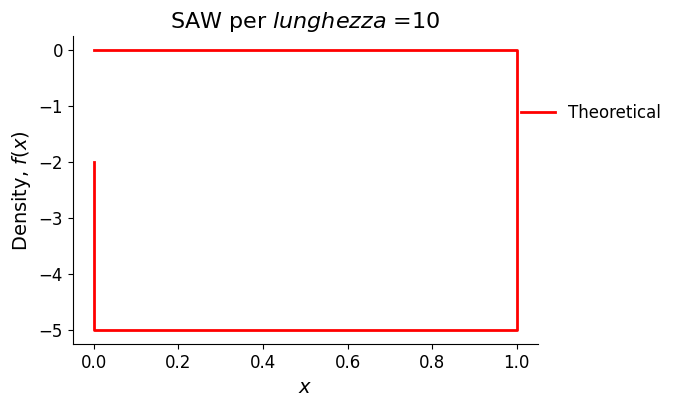

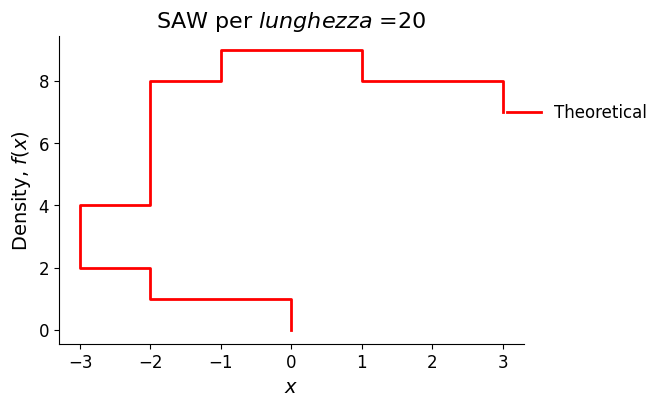

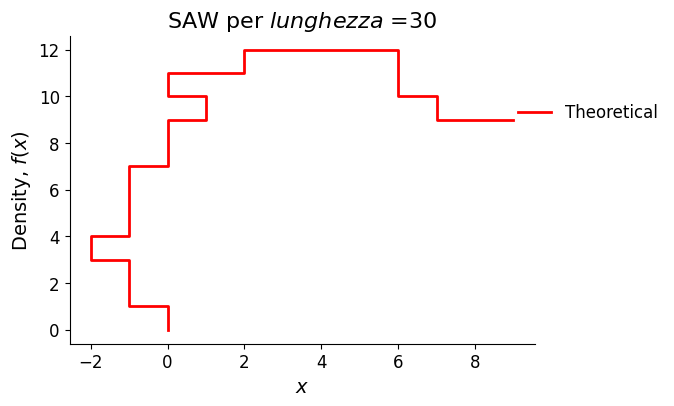

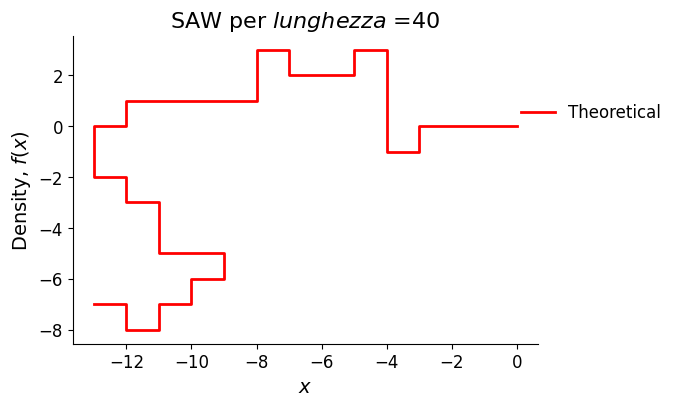

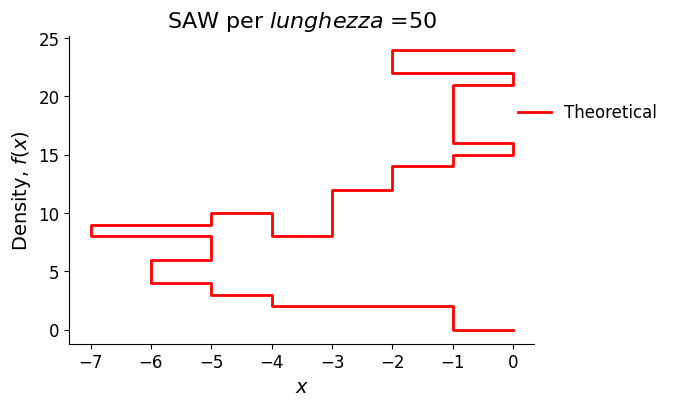

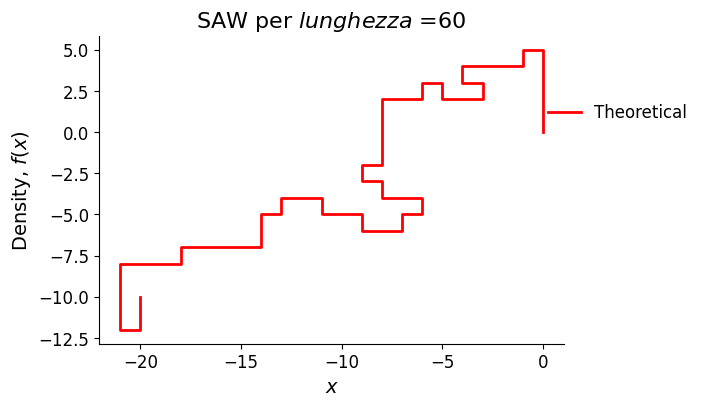

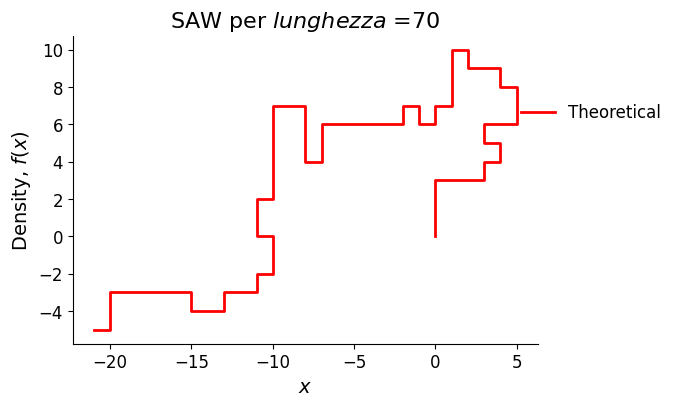

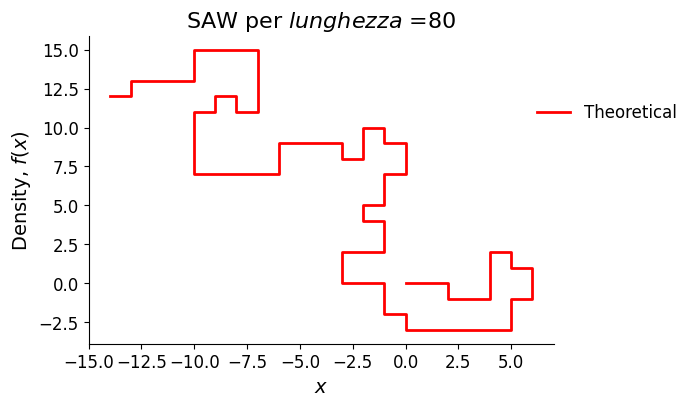

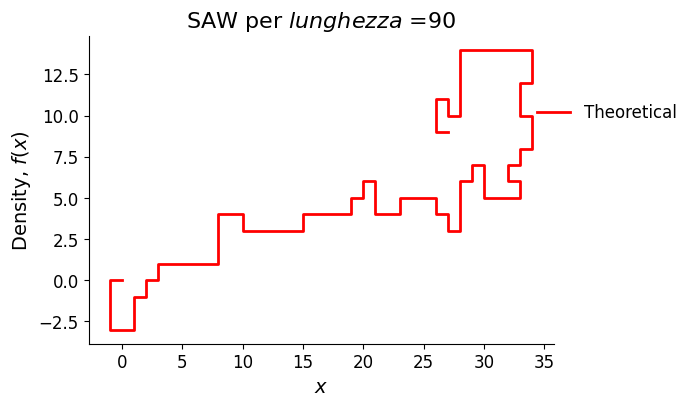

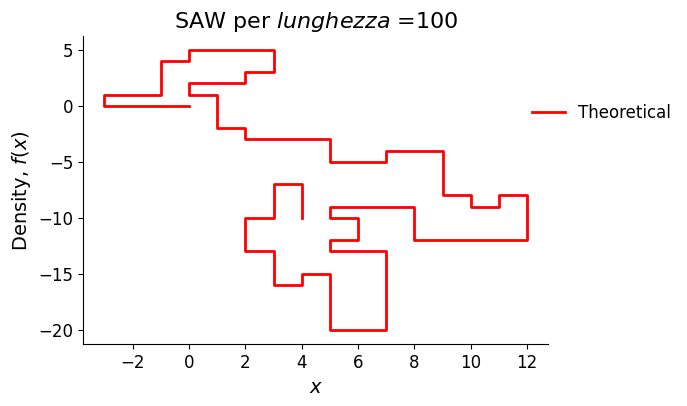

In [26]:
for i in range (0, 10):
    
    #lunghezza random walk
    length = i*10 + 10
    #genero SAW
    traj_SAW = get_first_SAW(length = length)
    
    #creo il grafico
    fig, ax = plt.subplots(1, 1, figsize=(6, 4))

    # plot SAW
    ax.plot(
        traj_SAW[ : , 0], traj_SAW[ : , 1], 
        color = "red",
        lw = 2,
        label = "Theoretical"
    )
    
    # add labels for axes
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"Density, $f(x)$")
    
    
    # add legend
    ax.legend(loc=(0.95, 0.7), frameon=False)
    
    # add title
    ax.set_title(f"SAW per $lunghezza$ ={length}")
    
        

### Exercise 3.14
Write a function `get_next_SAW` that, given a SAW, generates another SAW using the pivot algorithm. Your function should check that the input RW is really a SAW. Remember the steps:

1. Apply the pivot transformation
2. Check if the new path is self-avoiding. **If so, return it. Otherwise, return the original path.**

In [27]:
def get_next_SAW(traj):
    # make sure input traj is SAW
    assert count_self_intersections(traj) == 0
    
    # pivot step
    proposed_traj = pivot_traj(traj)
    
    # count intersections
    num_intersections = count_self_intersections(proposed_traj)
    
    # if it's a SAW
    if (num_intersections == 0):
        return proposed_traj
    
    # if not
    else:
        return traj

### Mean Squared Displacement in SAW
A quantity of interest in RWs is the mean squared displacement, which is simply the (squared) distance between the endpoints of the walk. Usually, one writes

$$
\left\langle X(n)^2 \right\rangle \sim n^{2 \nu}
$$

As you know, for a standard RW of $n$ steps, the mean-squared displacement scales like $n$, so $\nu=1/2$. However, the exponent for SAW is **different**! Althought it has not been formally proven (still), it is believed that the exponent for SAW is $\nu=3/4$. That is, for a self-avoiding random walk, the mean squared displacement scales as $n^{3/2}$.

### Exercise 3.15
Explain why it makes sense that the mean-squared displacement exponent of SAW is **greater** than that of standard RW. 

### Exercise 3.16
Verify numerically the scaling of the mean-squared displacement of SAW. Notice that you don't need to store all the SAWs, just the endpoints. You could follow this scheme:

1. Generate a first SAW with your `get_first_SAW()` function
2. Generate the next SAW using your `get_next_SAW()` function, and store the endpoint.
3. Iterate step 2 for as many steps as required
4. Compute the average mean-squared displacement of the stored endpoints

Then repeating steps 1-4 for different lengths, and plot the results in double-logarithmic axis. Compare your results with the theoretical exponent. Do they agree?

In [28]:
# define range of RW lengths
length_min = 10
length_max = 100
num = 5
# generate points logarithmically spaces
# and convert them to integers
length_array = np.array([
    int(x)
    for x in np.geomspace(length_min, length_max, num = num)
])

print(length_array)

[ 10  17  31  56 100]


In [29]:
#Genero i vari SAW
n_iterazioni = 10
distance = np.zeros(shape = (num, 1))


#Calcolo i valori della diffusione
for i in range(0, num):
    #Genero il primo cammino SAW
    traj = get_first_SAW(length = length_array[i])
    #Valuto la prima distanza
    distance[i, 0] = traj[length_array[i]-1, 0] ** 2 + traj[length_array[i]-1, 1] ** 2
    
    
    
    #Itero ragionamento
    for t in range(1, n_iterazioni):
        #Evolvo il mio SAW
        traj1 = get_next_SAW(traj)
        traj = traj1
        
        #calcolo la distanza media
        distance[i, 0] = distance[i, 0] * t/(t+1) + (traj[length_array[i]-1, 0] ** 2 + traj[length_array[i]-1, 1] ** 2)/(t+1)
    
    

Trovato SAW
Trovato SAW
Trovato SAW
Trovato SAW
Trovato SAW


Text(0.5, 1.0, 'Numerical vs Theoretical results')

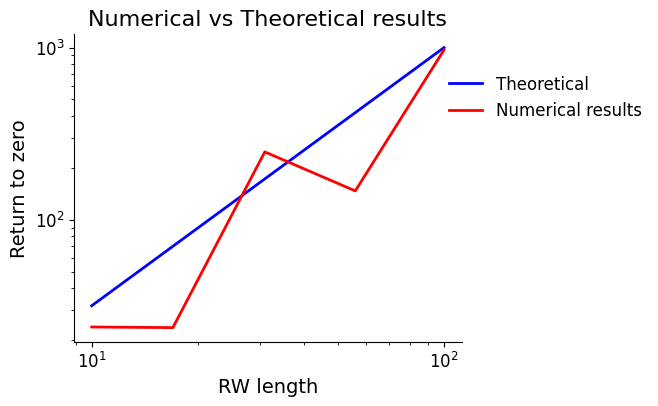

In [30]:
#Creo output grafico
fig, ax = plt.subplots(1, 1, figsize=(5, 4))

#Calcolo risultato teorico
y_teo = length_array ** (3/2)
ax.loglog( 
    length_array, y_teo,
    color = "blue",
    lw = 2,
    label="Theoretical")


ax.loglog(
    length_array, distance,
    color = "red",
    lw = 2,
    label="Numerical results"
)

# add axis labels
ax.set_xlabel(r"RW length")
ax.set_ylabel(r"Return to zero")
# add a legend
ax.legend(loc=(0.95, 0.7), frameon=False)
# add a title (e.g. that says what dimension we used)
ax.set_title(f"Numerical vs Theoretical results")
    
    
